In [21]:
%matplotlib inline
import os
import re

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

/lfs1/home/jackyu/anaconda3/envs/work/lib/python3.4/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'climatools.scripts.g1_threshold' from '/lfs1/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [22]:
# for printing some input parameters

def innames():
    return ['vstar', 'nband', 'nv', 'dv',
            'tsfc', 
            'pressure_reference_high',
            'temperature_reference_high', 
            'pressure_reference_low', 
            'temperature_reference_low',
            'ighigh', 
            'ng', 
            'absth',
            'wgt']


def pattern_assign(name):
    return ''' 
    parameter .* :: .* ({} .* = .* \n)
    '''.format(name)

def pattern_data(name):
    return '''
    (data [^/]+ {}[^,] [^/]+ / [^/]+ /)
    '''.format(name)

def pattern_atmpro():
    return '''
    (include \s+ '.*\.pro')
    '''


def get_input_params(code, names):
    results = []
    for name in names:
        regex = re.compile(pattern_assign(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
        regex = re.compile(pattern_data(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
    regex = re.compile(pattern_atmpro(), re.VERBOSE)
    results.extend(regex.findall(code))
        
    results = [result.replace('_r8', '') for result in results]
    return results


In [23]:
analysis = scripts.Analysis()

In [24]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/lfs1/home/jackyu/radiation/crd',
                          'LW/examples',
                          'separate_g_groups/study__lblnew_g1_threshold',
                          'n2o',
                          'band07_wn_1215_1380',
                          'P_500_T_250_ng_25_dlogN_uniform__P_1_T_250_ng_5_dlogN_uniform',
                          'wgt_25x1_5x.7',
                          'midlatitude_summer')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [25]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/lfs1/home/jackyu/radiation/crd',
                          'LW/examples',
                          'separate_g_groups/study__lblnew_g1_threshold',
                          'n2o',
                          'band07_wn_1215_1380',
                          'P_500_T_250_ng_25_dlogN_uniform__P_1_T_250_ng_5_dlogN_uniform',
                          'wgt_25x1_5x.7',
                          'midlatitude_summer')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [26]:
fig = analysis.fig_fluxcoolr('fig1')
fig.ggroups = list(range(1, 30 + 1))
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [27]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [28]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [29]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [30]:
# print some input parameters

with open(os.path.join(crd.rundir, 'lblnew.f'), 
          mode='r', encoding='utf-8') as f:
    c = f.read()

print('\n\n'.join(get_input_params(c, innames())))

vstar = 1215

nband = 165

nv = 200

dv = 0.005

tsfc = 294.0

pressure_reference_high = 1.

temperature_reference_high = 250.

pressure_reference_low = 500.

temperature_reference_low = 250.

ighigh = 25

ngas = 6      

ng = 30

data absth(:, 1) /

!     thresholds for reference (P, T) low
!     data absth(:, 2) /

data wgt
     &     /25 * 1.0, 5 * 0.7/

include 'mls75.pro'


In [31]:
fig.display_hrefanchor()

In [32]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()
table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [33]:
table_dgdgs.display_hrefanchor()

In [34]:
s_abscom = 'Overall absth'
display.HTML(climahtml.getHTML_hrefanchor(s_abscom))

In [35]:
#for g in range(1, 20 + 1):
#    s = 'Table: cooling rate. g-group {}'.format(g)
#    html = climahtml.getHTML_hrefanchor(s)
#    display.display(display.HTML(html))

# Figure: flux, cooling rate. g-group 1

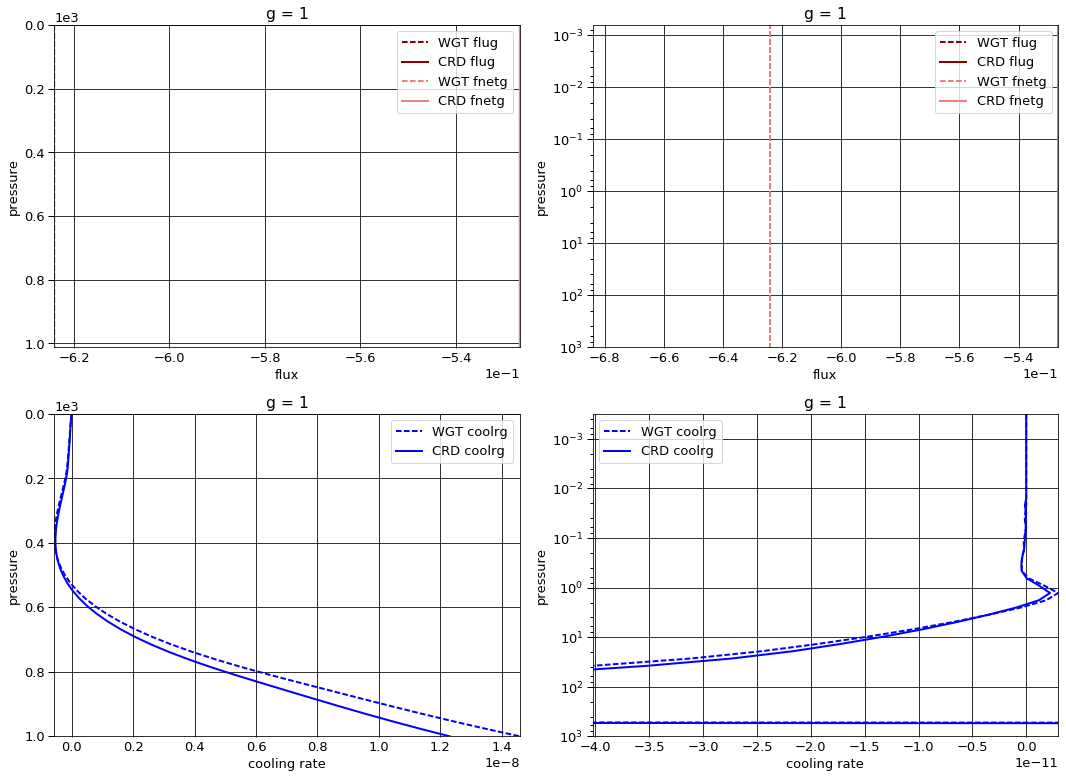

# Figure: flux, cooling rate. g-group 2

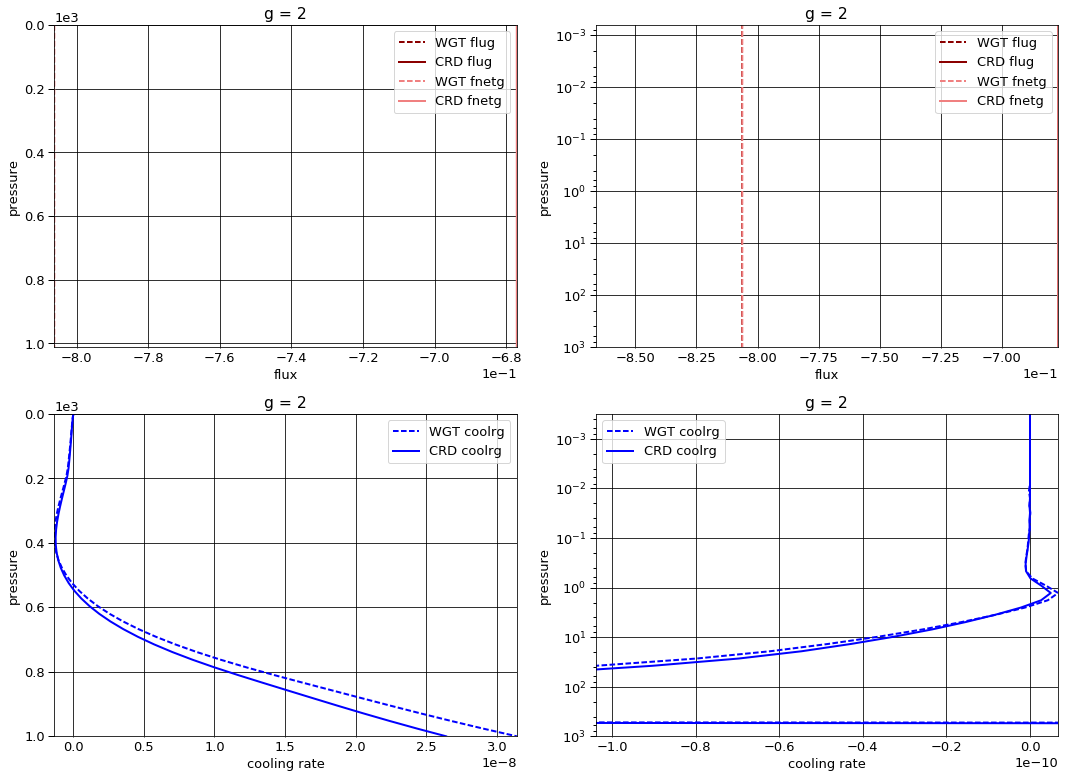

# Figure: flux, cooling rate. g-group 3

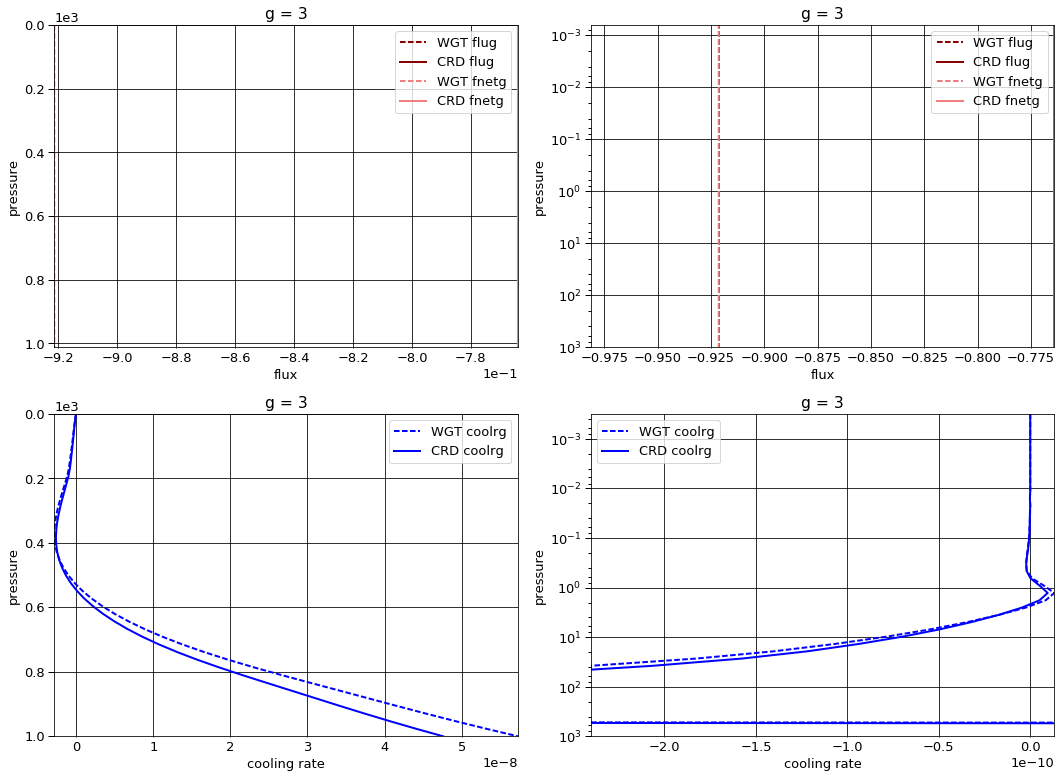

# Figure: flux, cooling rate. g-group 4

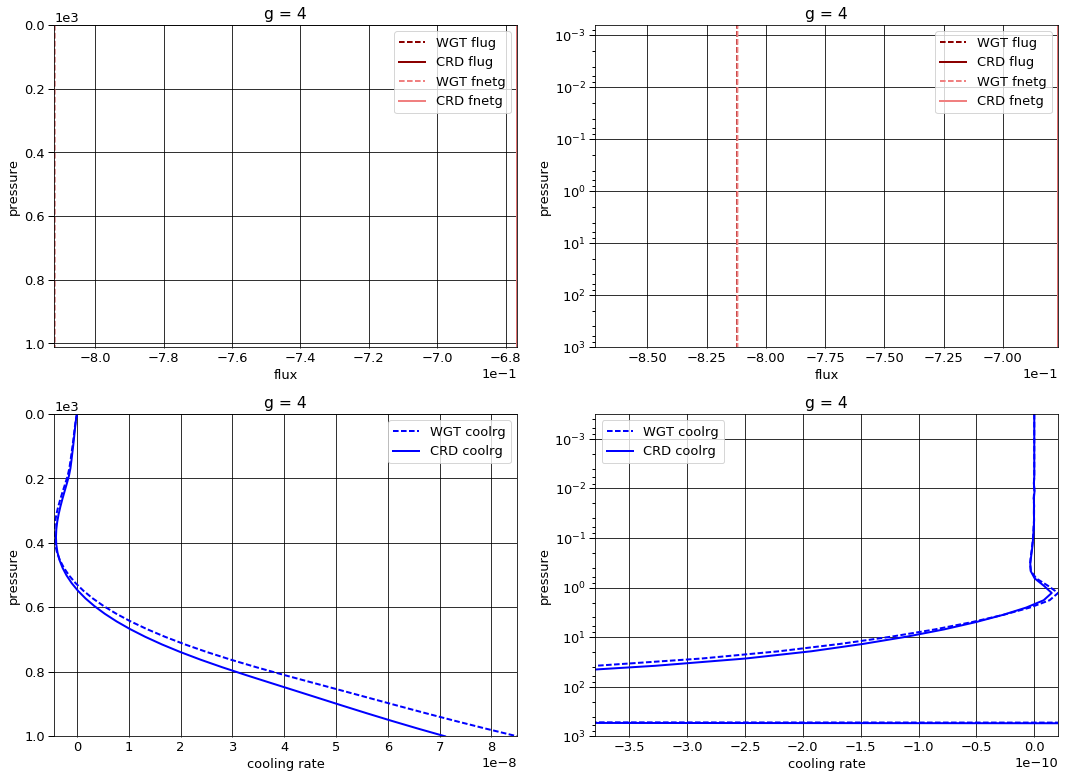

# Figure: flux, cooling rate. g-group 5

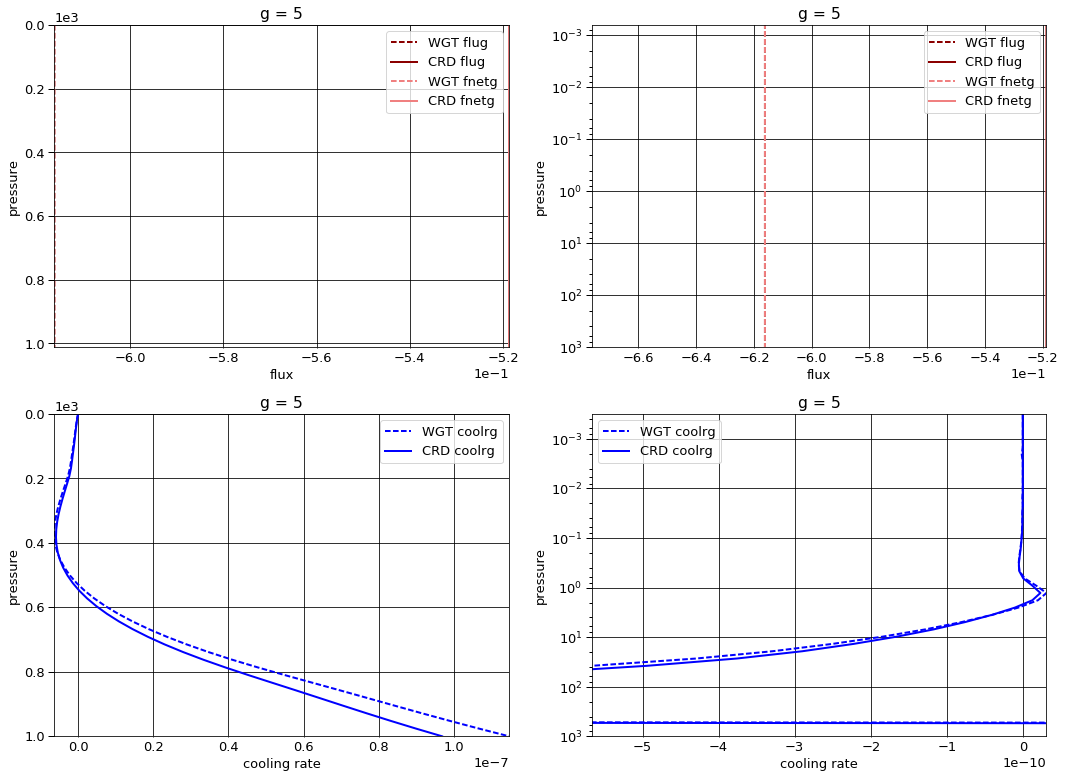

# Figure: flux, cooling rate. g-group 6

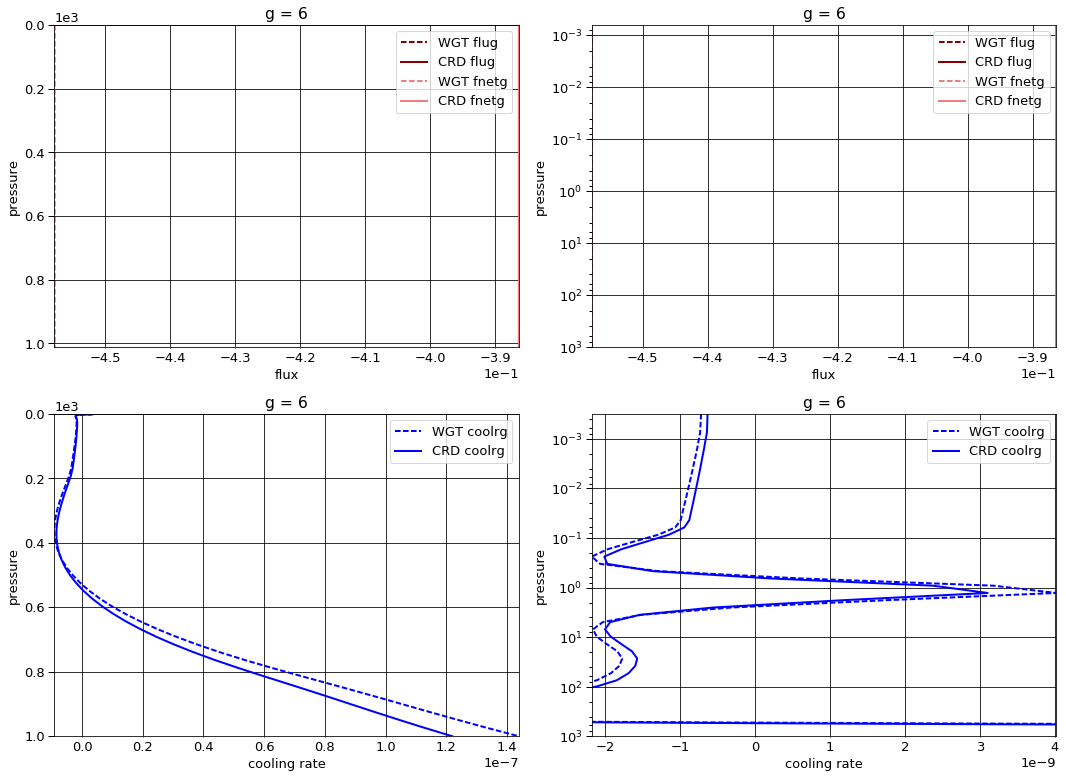

# Figure: flux, cooling rate. g-group 7

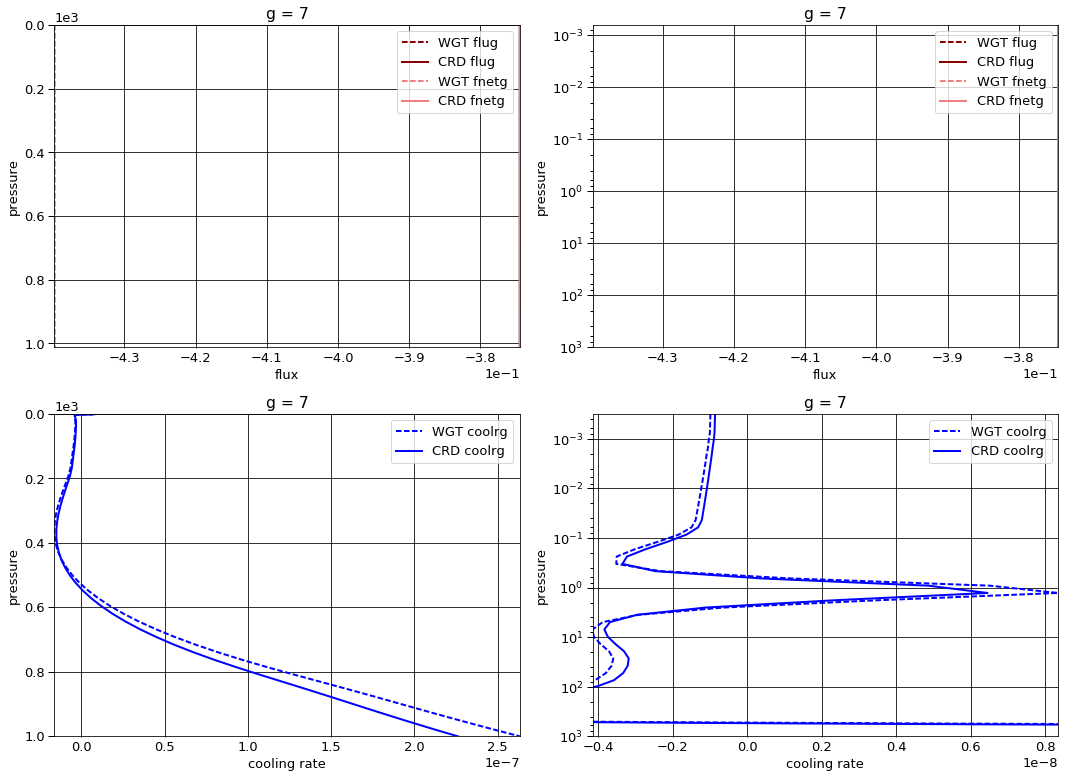

# Figure: flux, cooling rate. g-group 8

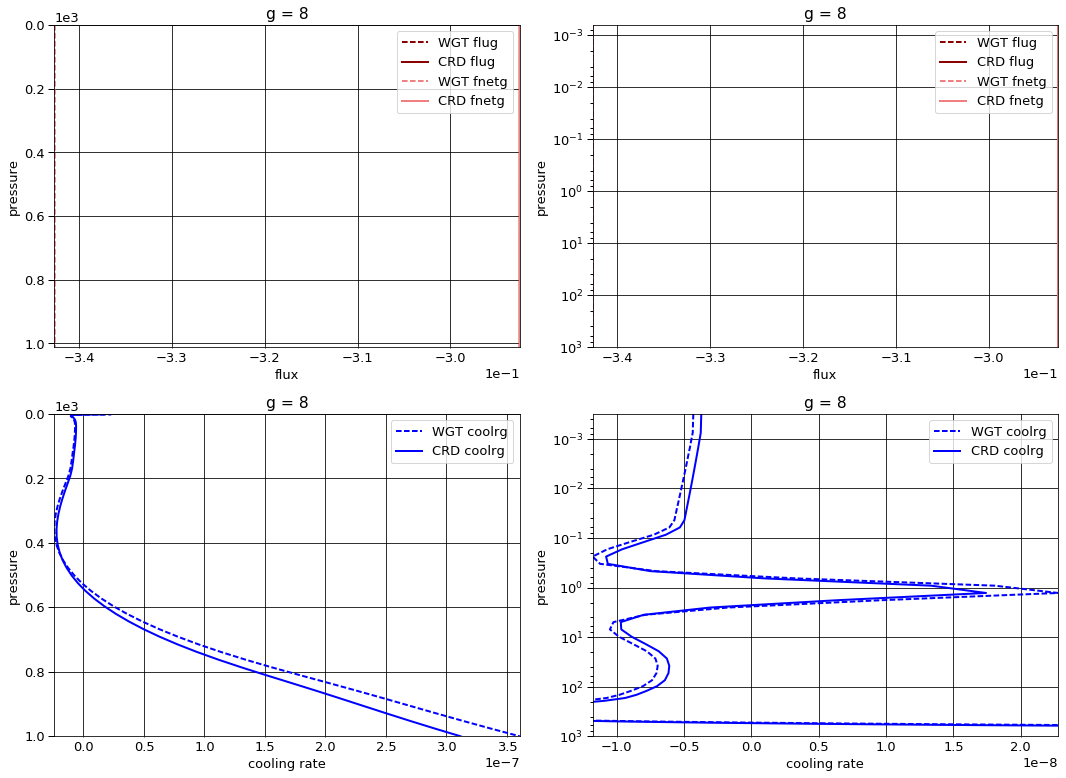

# Figure: flux, cooling rate. g-group 9

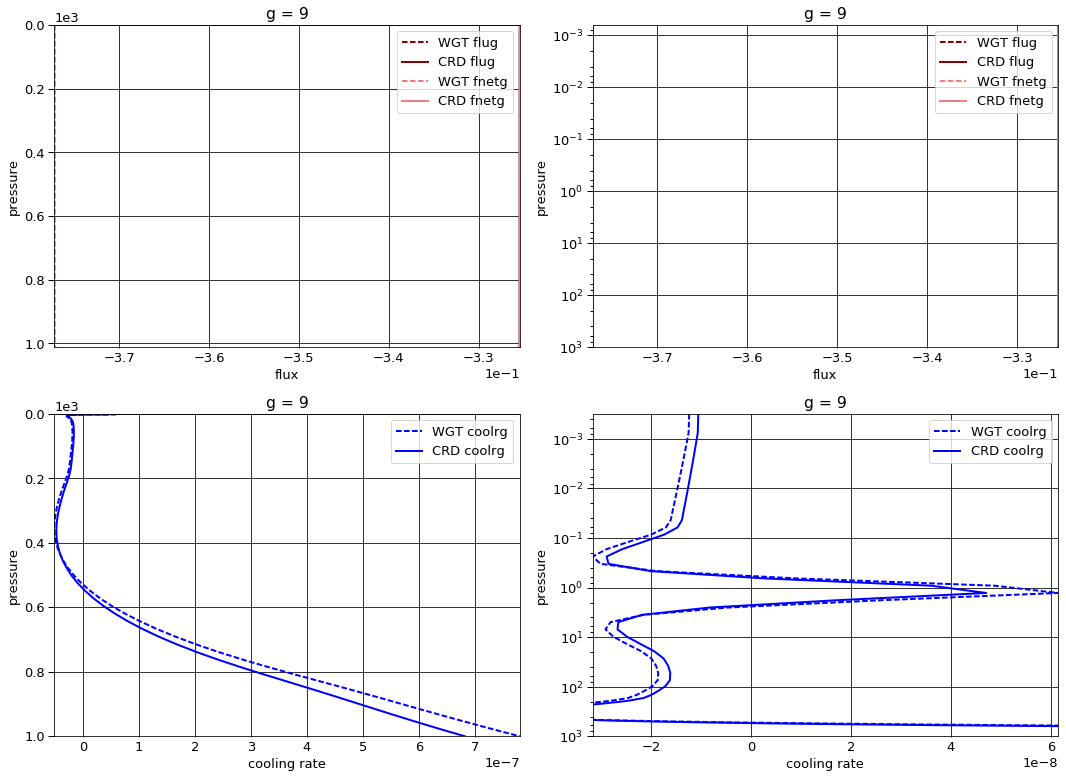

# Figure: flux, cooling rate. g-group 10

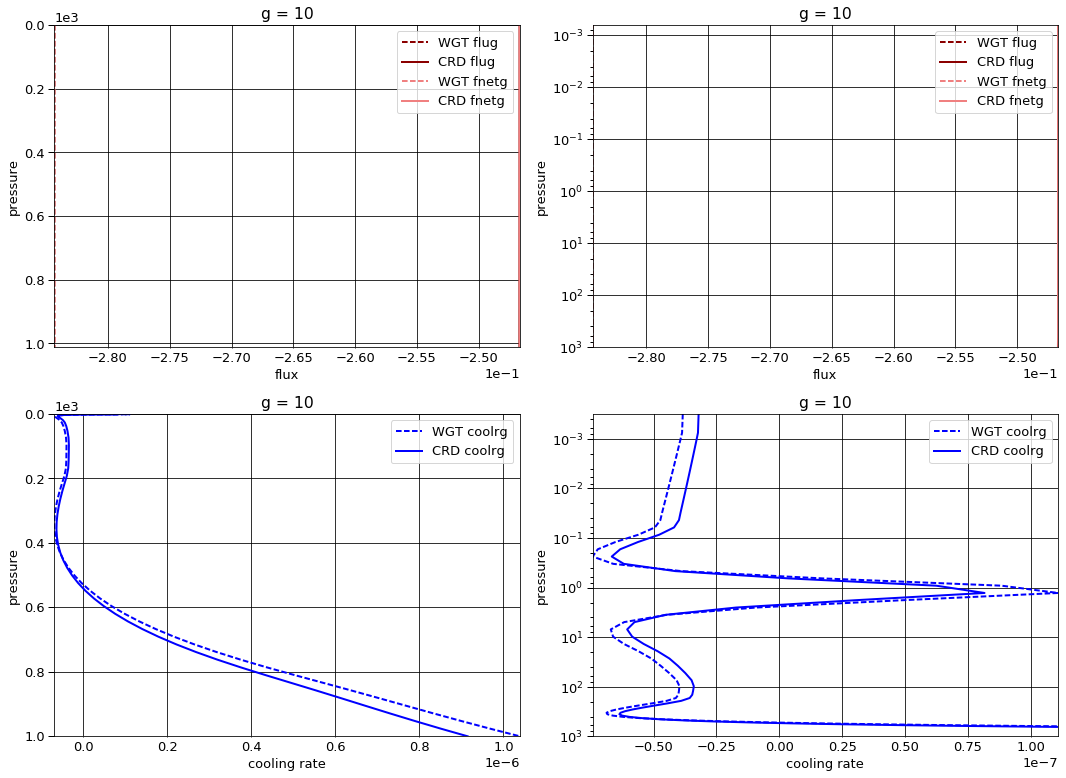

# Figure: flux, cooling rate. g-group 11

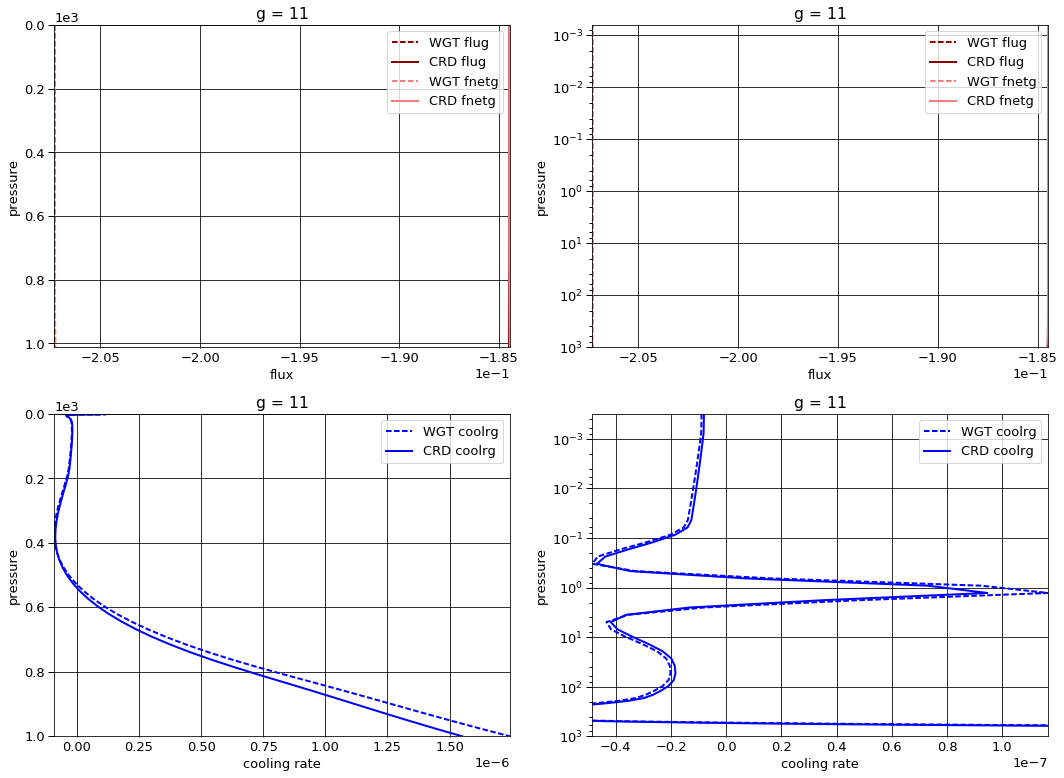

# Figure: flux, cooling rate. g-group 12

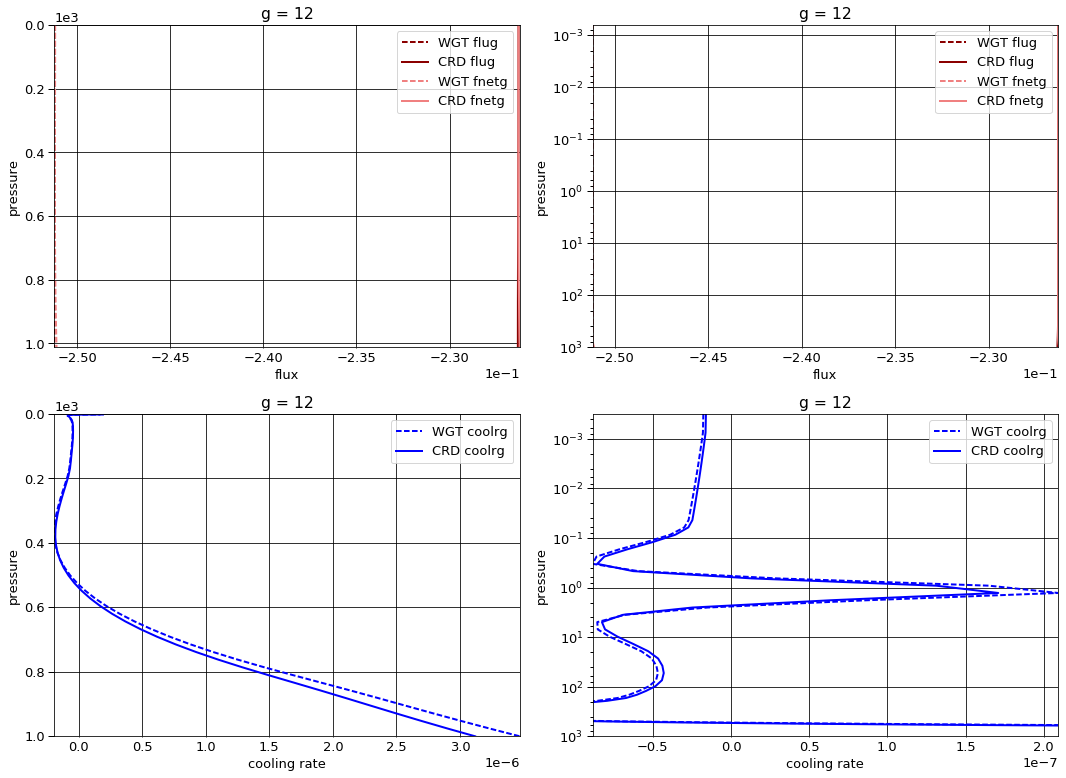

# Figure: flux, cooling rate. g-group 13

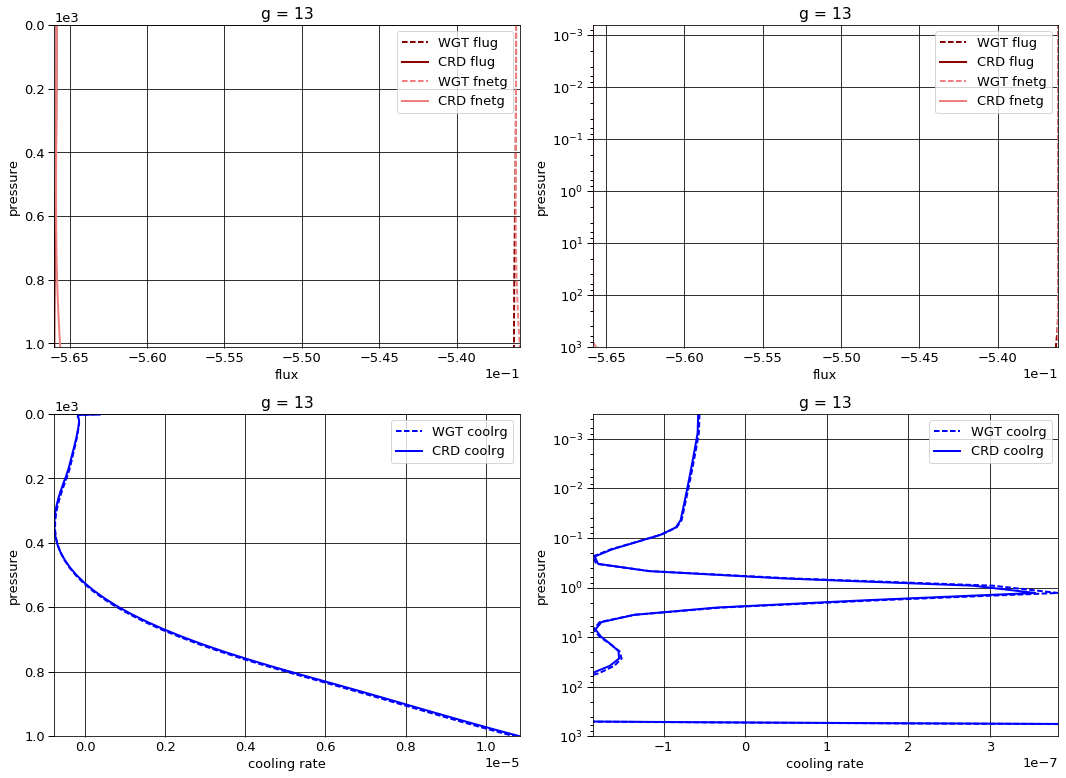

# Figure: flux, cooling rate. g-group 14

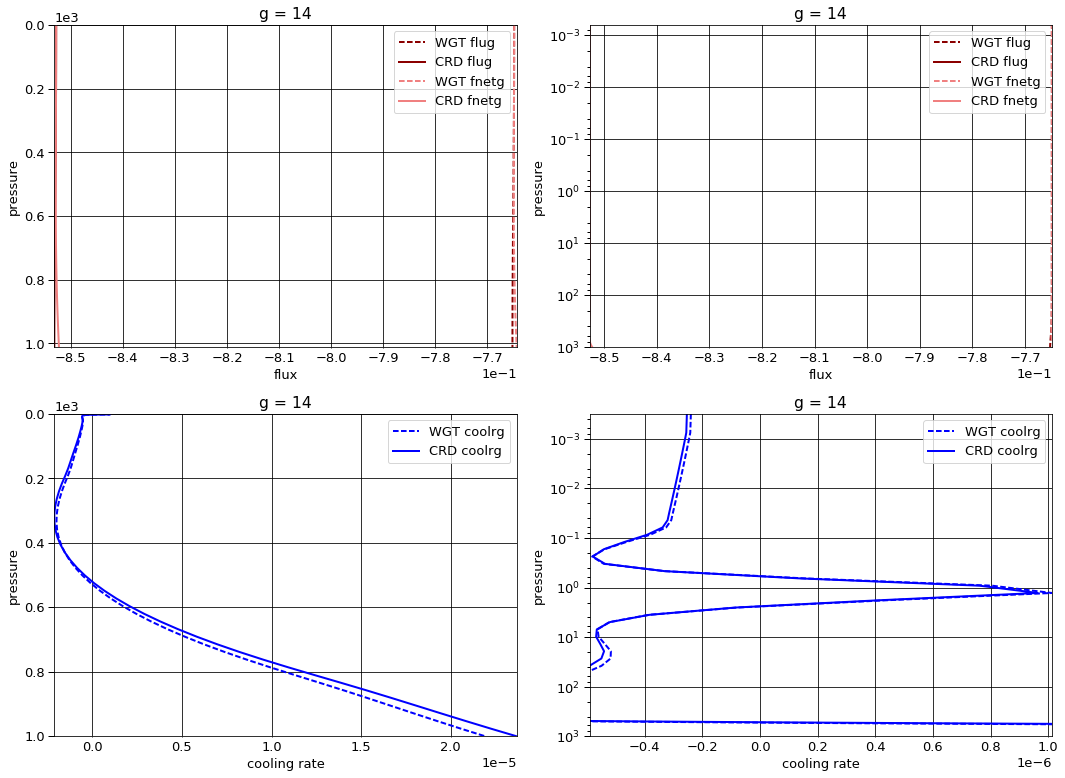

# Figure: flux, cooling rate. g-group 15

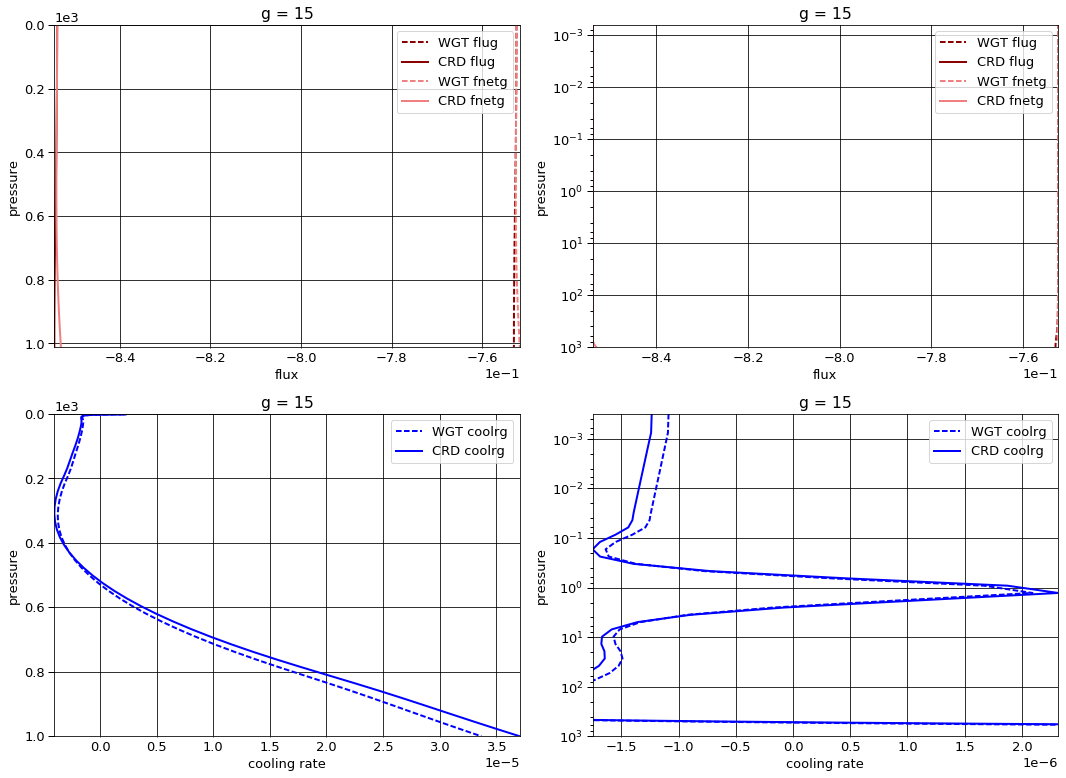

# Figure: flux, cooling rate. g-group 16

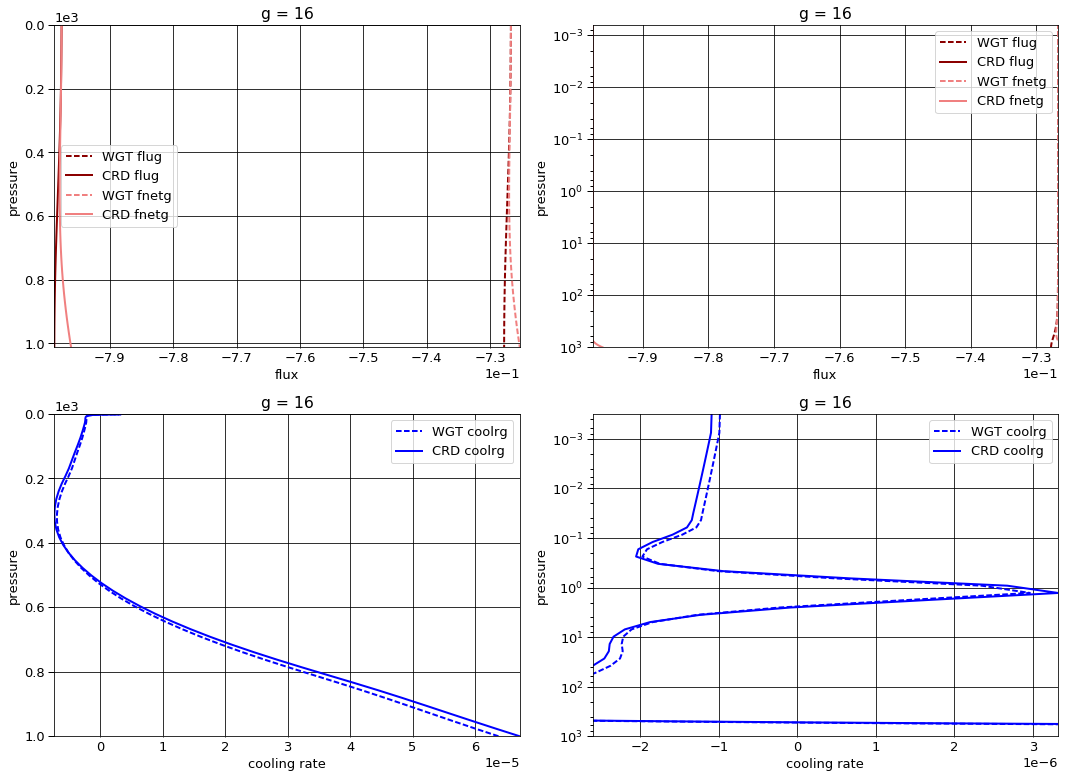

# Figure: flux, cooling rate. g-group 17

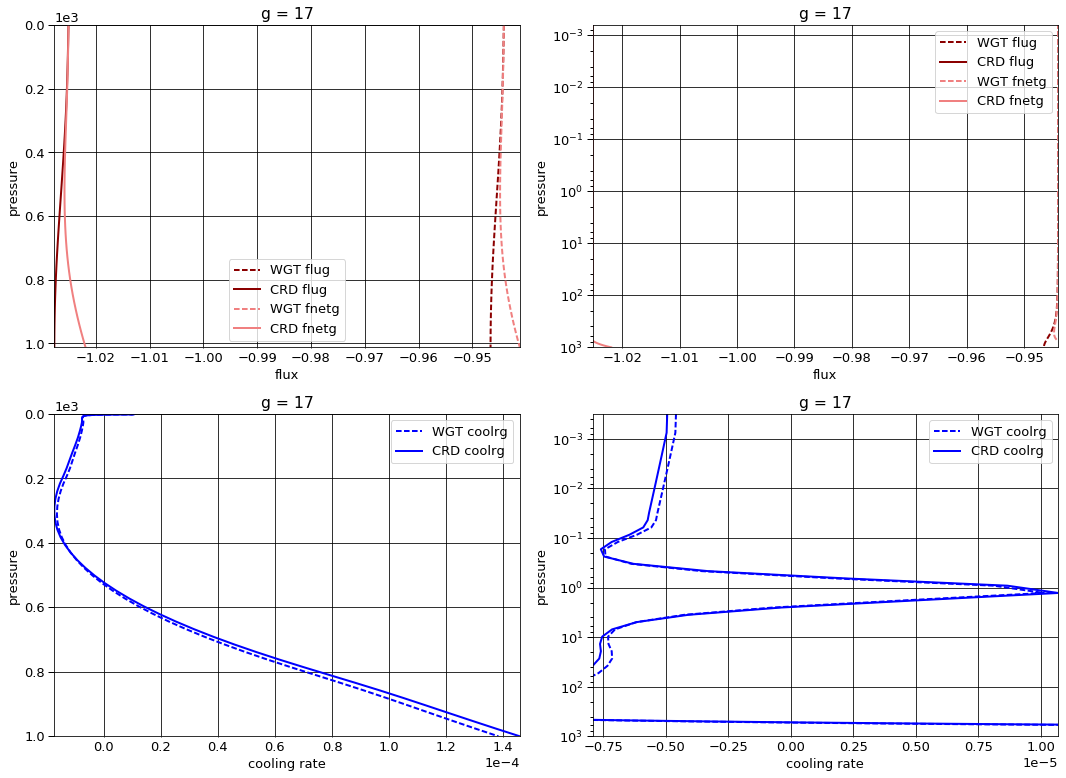

# Figure: flux, cooling rate. g-group 18

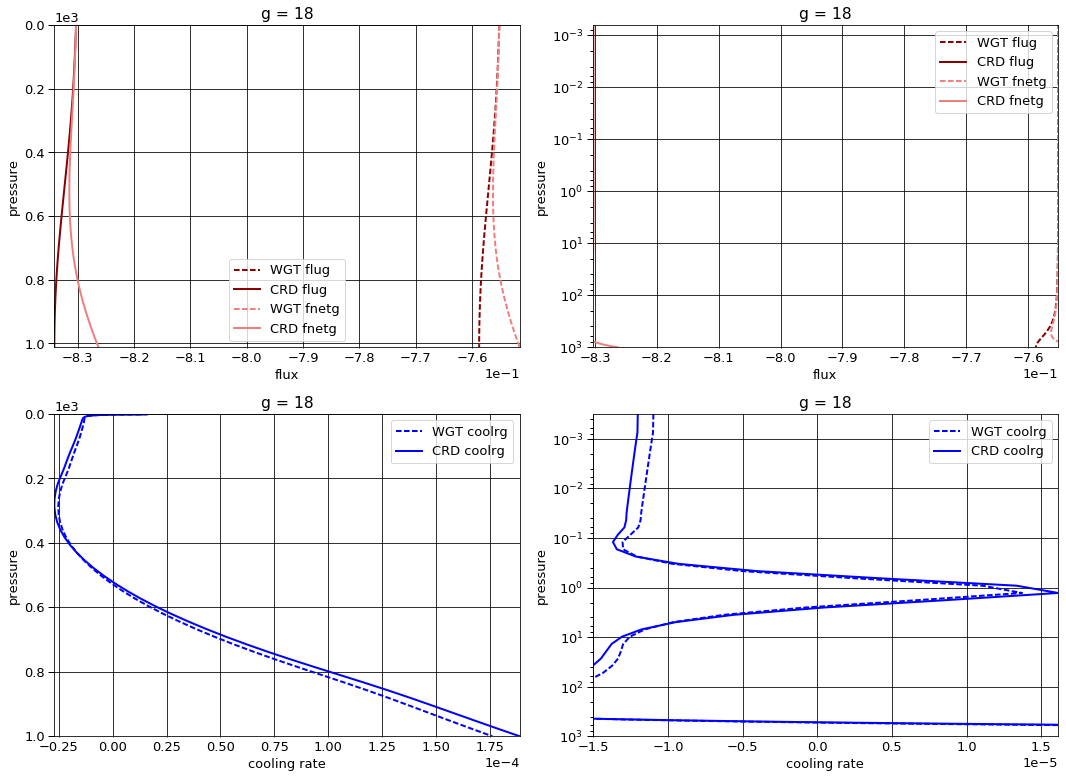

# Figure: flux, cooling rate. g-group 19

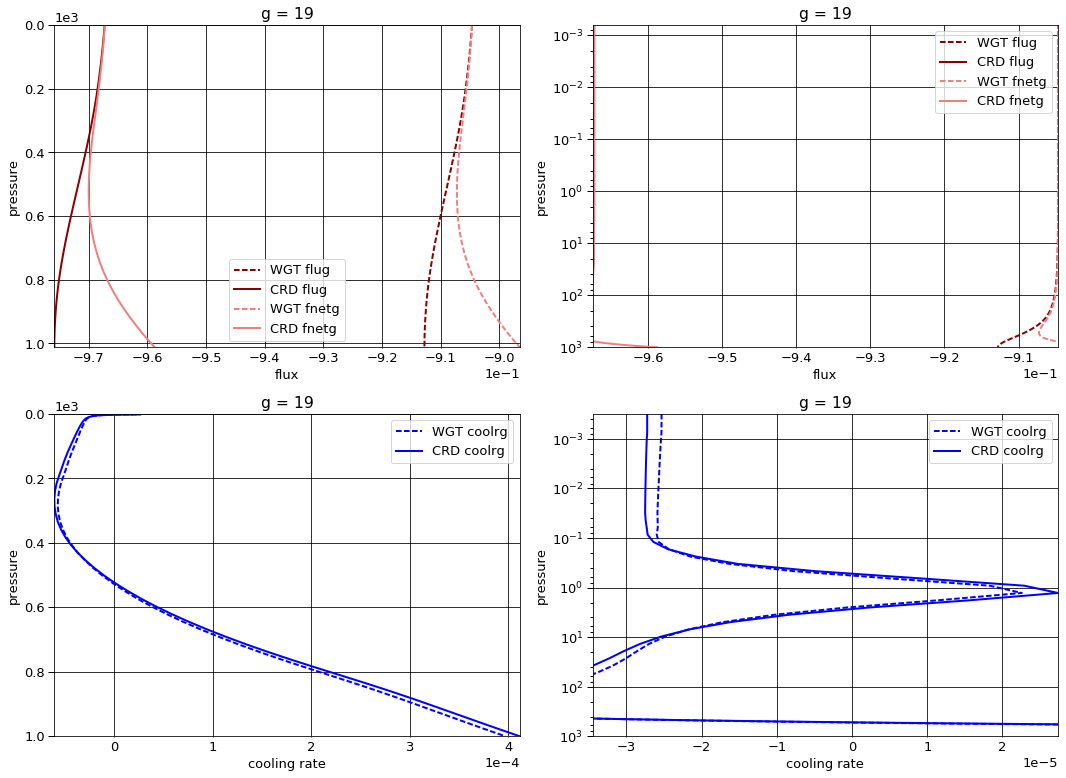

# Figure: flux, cooling rate. g-group 20

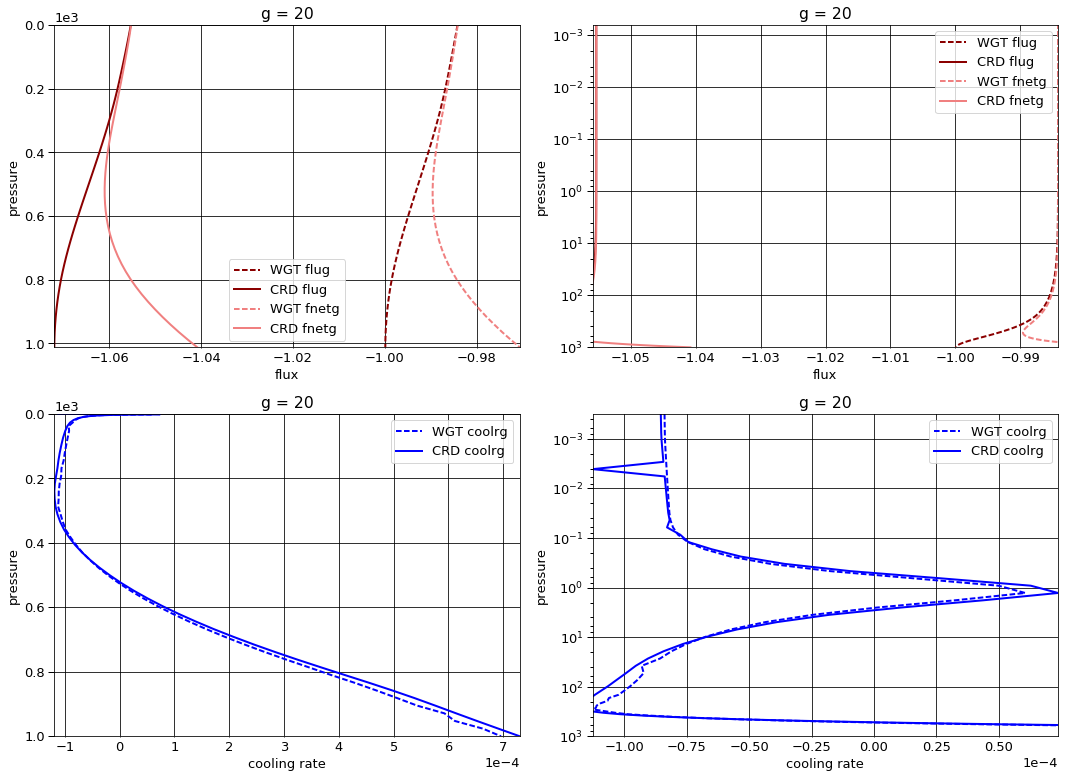

# Figure: flux, cooling rate. g-group 21

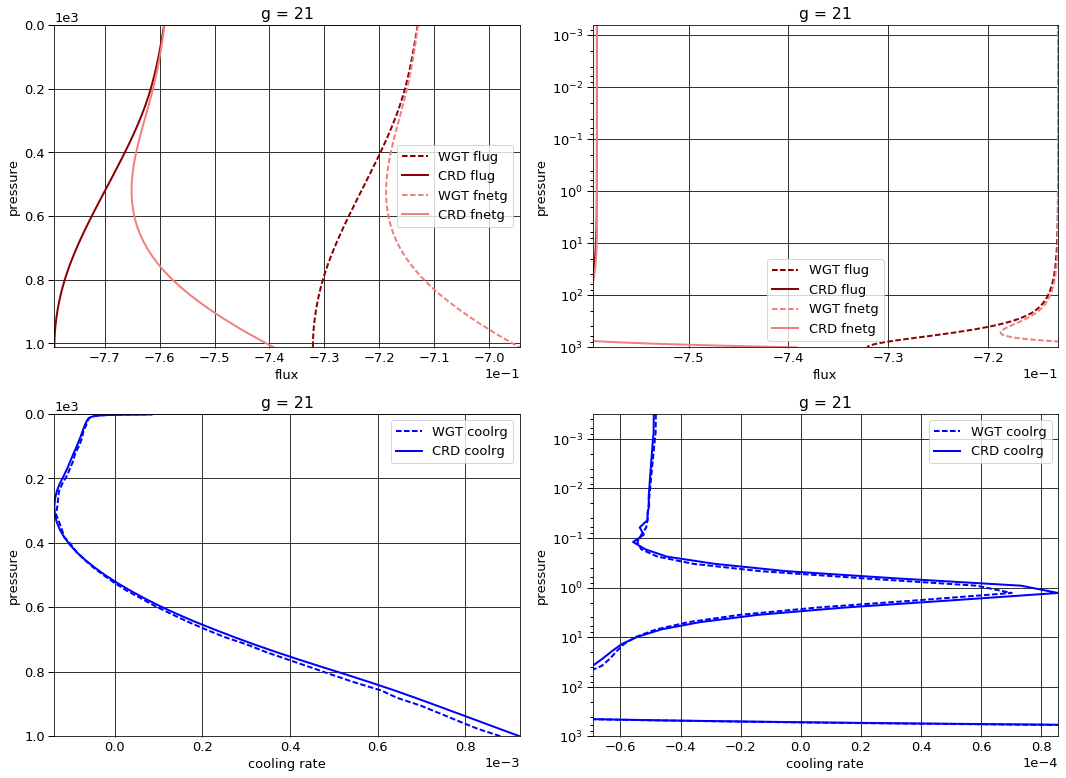

# Figure: flux, cooling rate. g-group 22

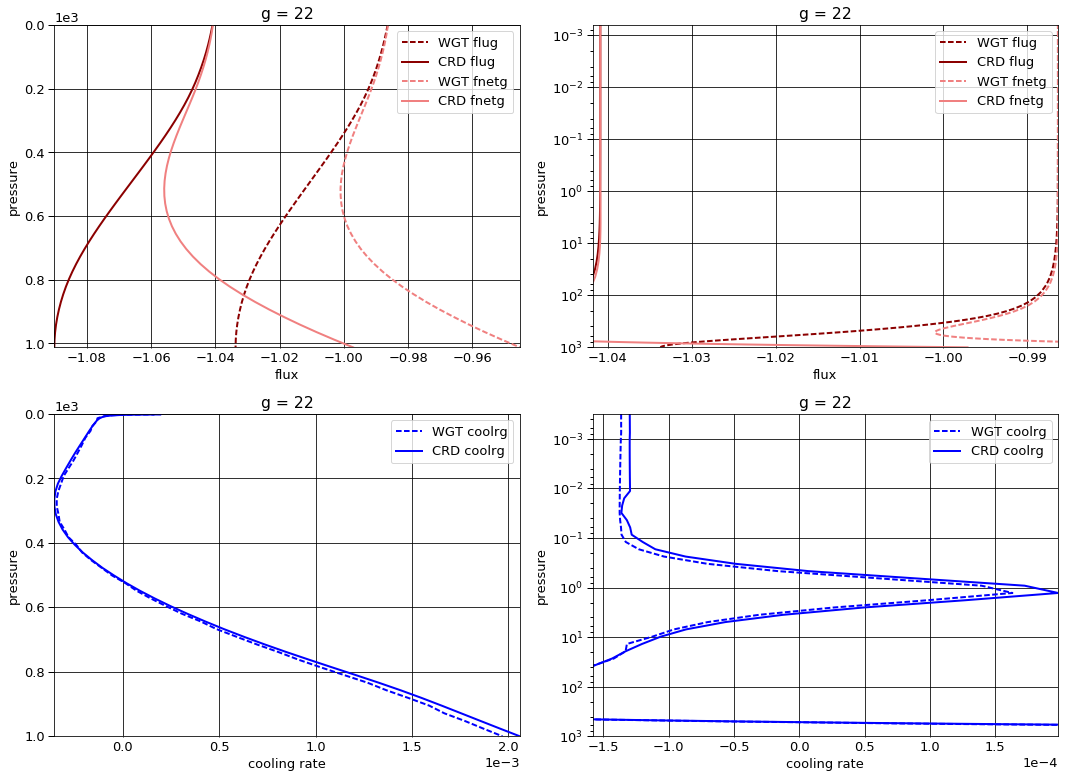

# Figure: flux, cooling rate. g-group 23

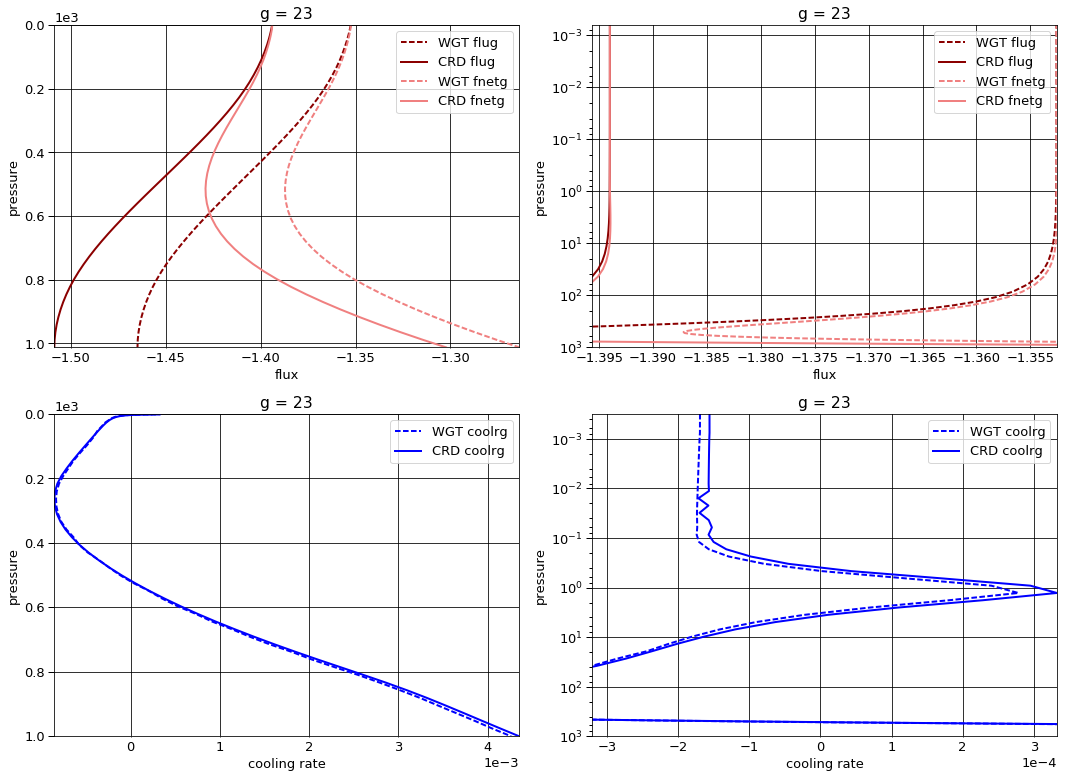

# Figure: flux, cooling rate. g-group 24

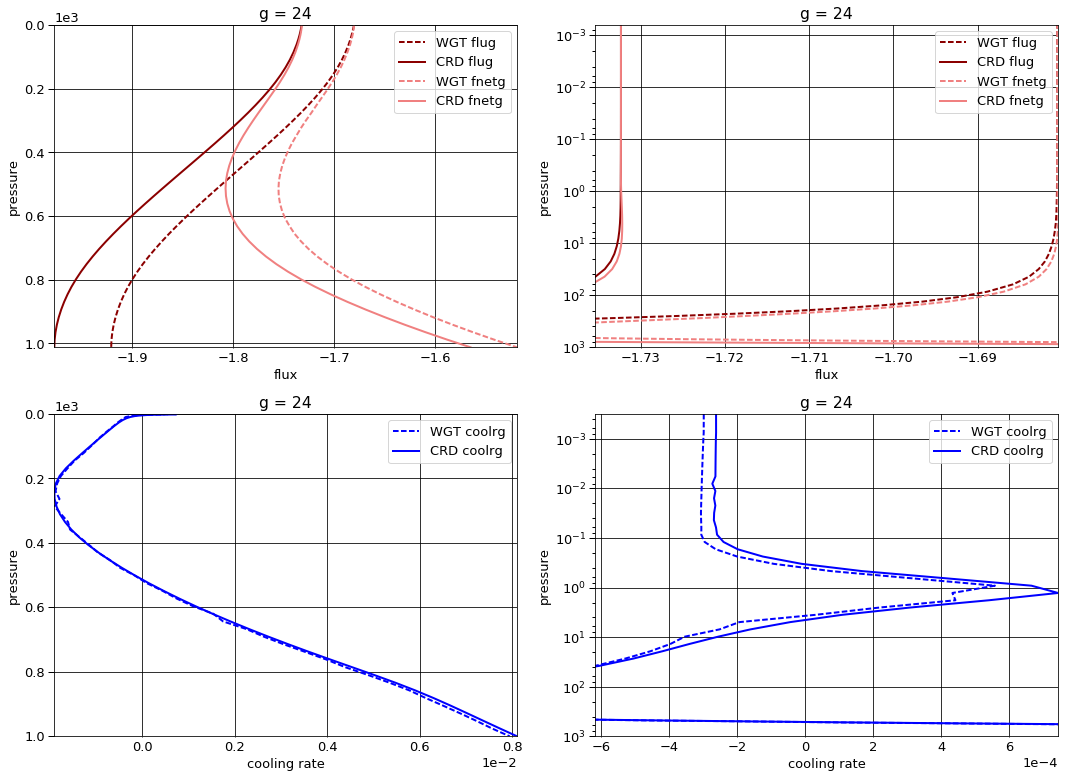

# Figure: flux, cooling rate. g-group 25

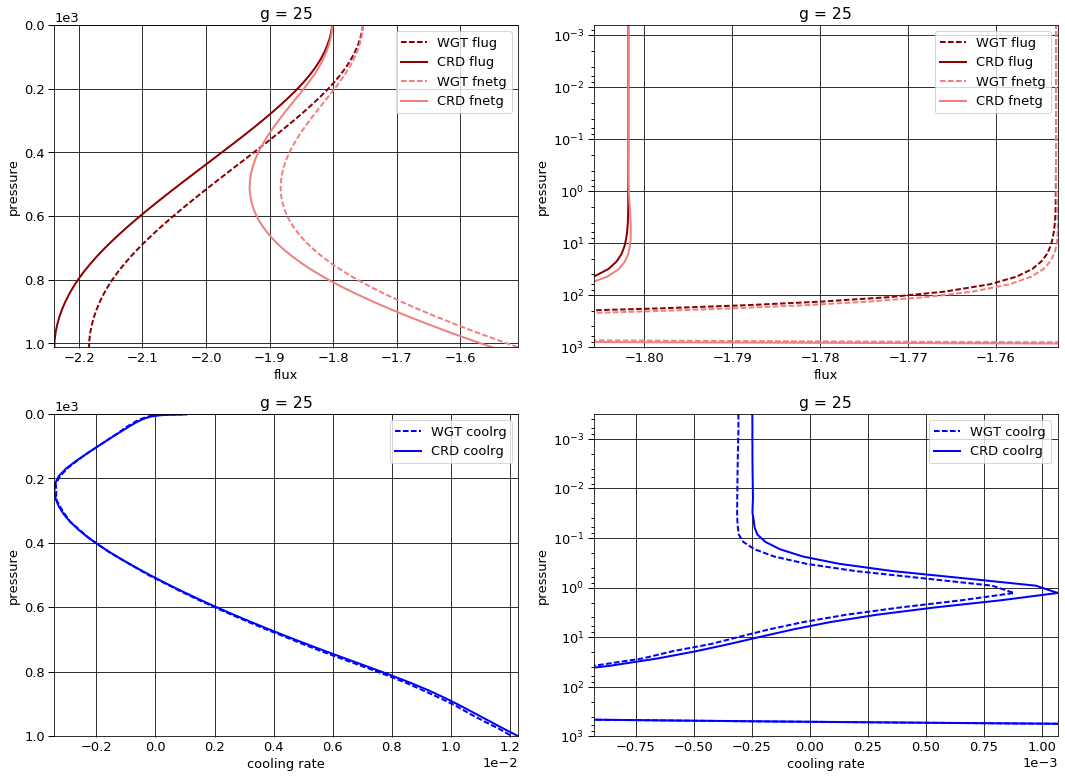

# Figure: flux, cooling rate. g-group 26

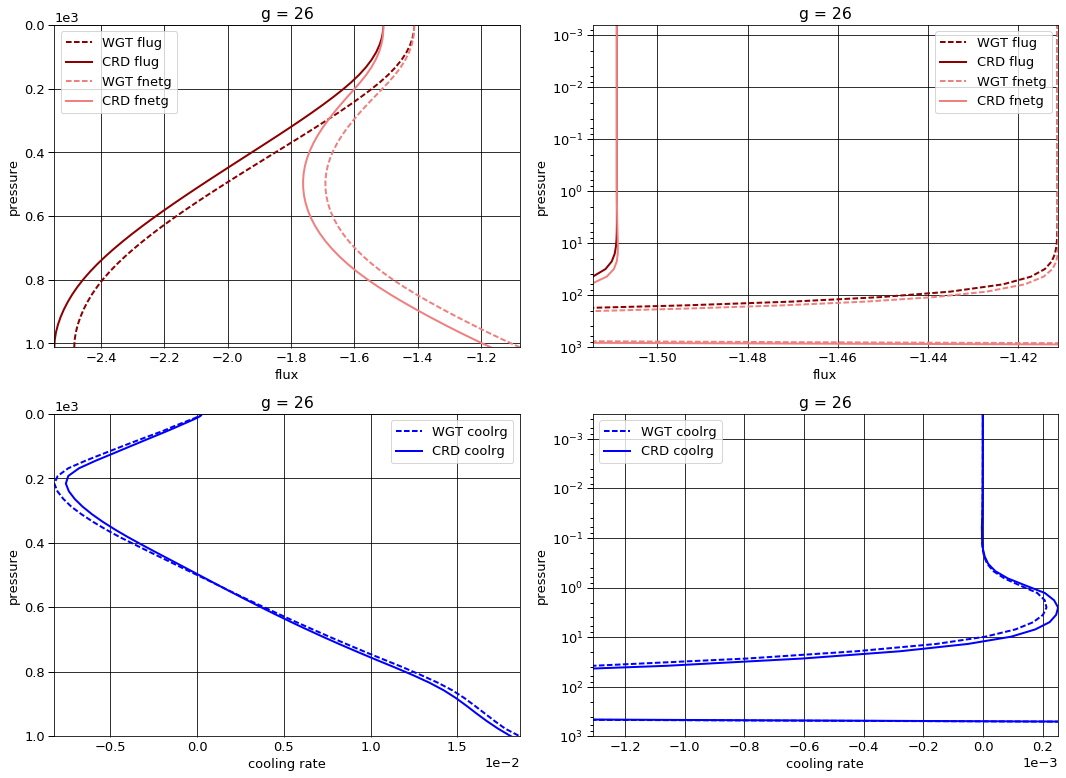

# Figure: flux, cooling rate. g-group 27

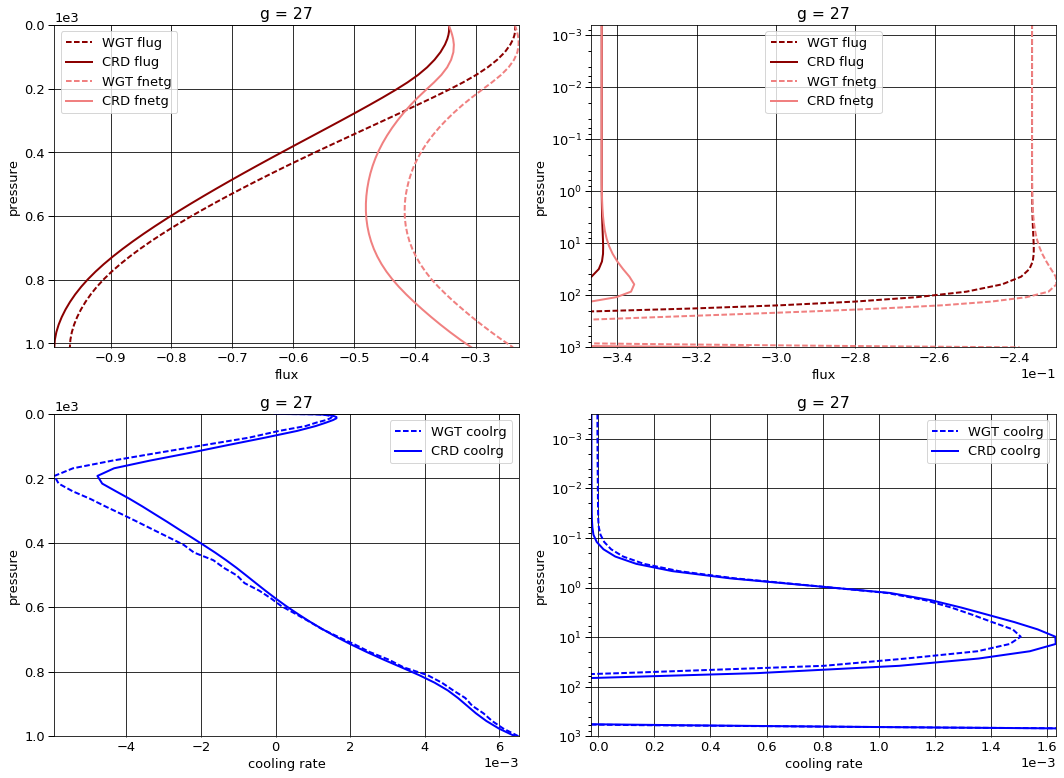

# Figure: flux, cooling rate. g-group 28

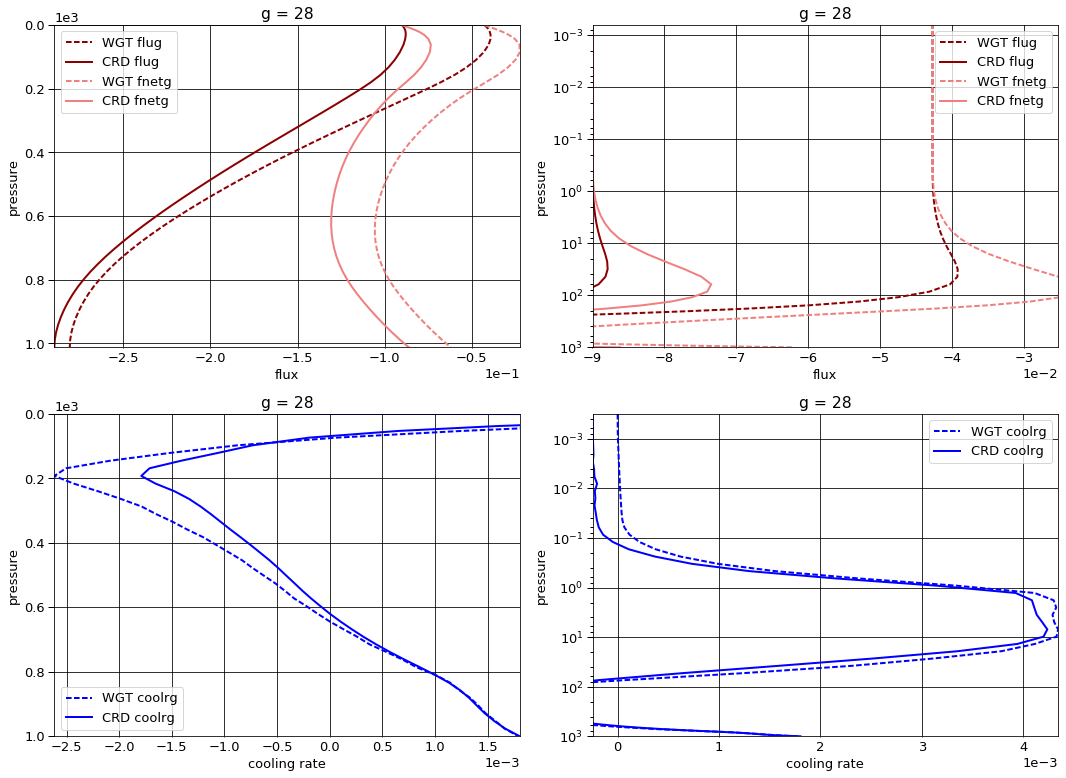

# Figure: flux, cooling rate. g-group 29

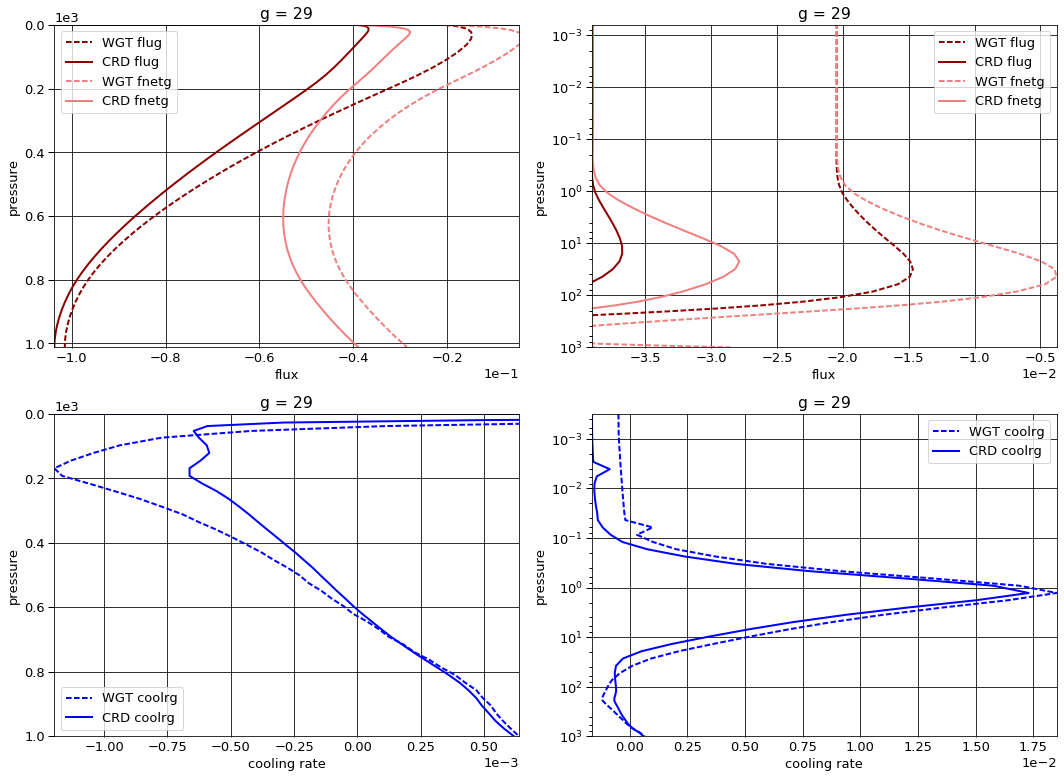

# Figure: flux, cooling rate. g-group 30

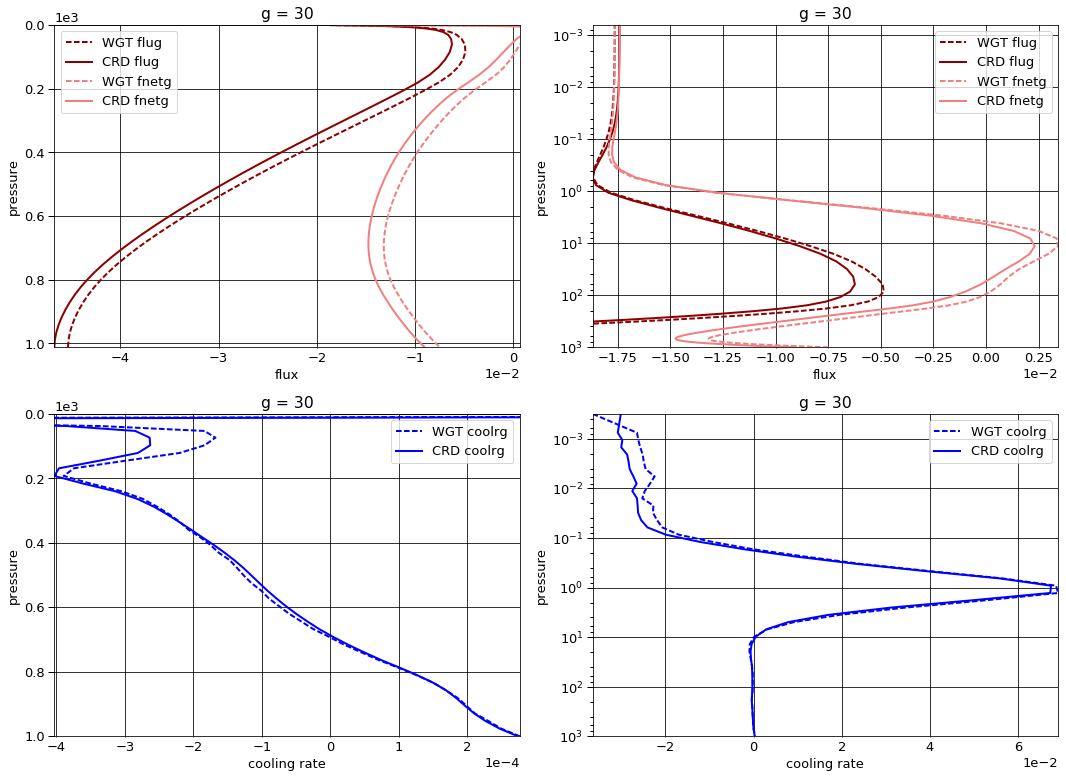

# Figure: flux, cooling rate. g-group total

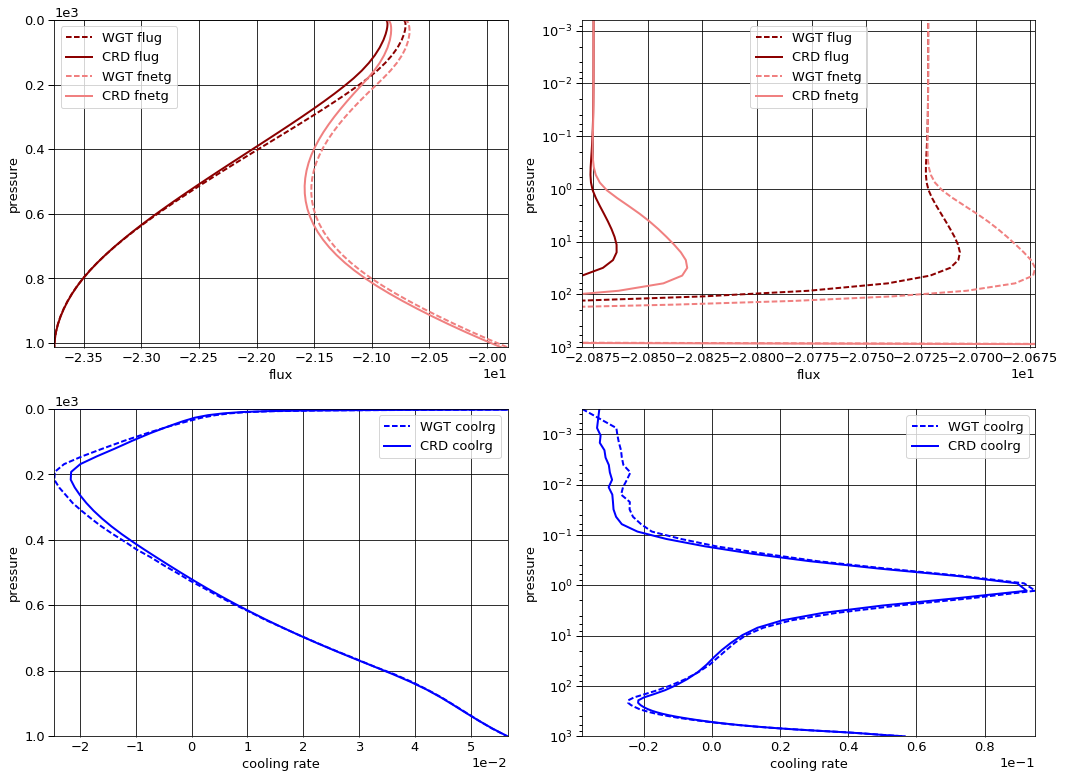

In [36]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [37]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug          fldg     fnetg
g  pressure level                                  
1  0.0      1     -0.526633  0.000000e+00 -0.526633
   1013.0   76    -0.526633  3.759776e-07 -0.526633
2  0.0      1     -0.677037  0.000000e+00 -0.677037
   1013.0   76    -0.677037  8.240331e-07 -0.677036
3  0.0      1     -0.764003  0.000000e+00 -0.764003
   1013.0   76    -0.764003  1.527220e-06 -0.764002
4  0.0      1     -0.676626  0.000000e+00 -0.676626
   1013.0   76    -0.676626  2.310066e-06 -0.676624
5  0.0      1     -0.518719  0.000000e+00 -0.518719
   1013.0   76    -0.518720  3.206039e-06 -0.518717
6  0.0      1     -0.386327  0.000000e+00 -0.386327
   1013.0   76    -0.386328  4.171340e-06 -0.386324
7  0.0      1     -0.374469  0.000000e+00 -0.374469
   1013.0   76    -0.374472  7.653142e-06 -0.374464
8  0.0      1     -0.292543  0.000000e+00 -0.292543
   1013.0   76    -0.292547  1.071354e-05 -0.292536
9  0.0      1     -0.325428  0.000000e+00 -0.325428
   1013.0   76    -0.325437  2.324005e-05 -0.325414
10 0.0      1     -0.246693  0.000000e+00 -0.246693
   1013.0   76    -0.246705  3.093190e-05 -0.246674
11 0.0      1     -0.184475  0.000000e+00 -0.184475
   1013.0   76    -0.184493  5.161269e-05 -0.184441
12 0.0      1     -0.226293  0.000000e+00 -0.226293
   1013.0   76    -0.226329  1.047255e-04 -0.226224
13 0.0      1     -0.565852  0.000000e+00 -0.565852
   1013.0   76    -0.565993  3.842353e-04 -0.565609
14 0.0      1     -0.852770  0.000000e+00 -0.852770
   1013.0   76    -0.853124  8.885567e-04 -0.852236
15 0.0      1     -0.853854  0.000000e+00 -0.853854
   1013.0   76    -0.854487  1.459877e-03 -0.853027
16 0.0      1     -0.797612  0.000000e+00 -0.797612
   1013.0   76    -0.798761  2.646532e-03 -0.796114
17 0.0      1     -1.025064  0.000000e+00 -1.025064
   1013.0   76    -1.027698  5.804019e-03 -1.021894
18 0.0      1     -0.830270  0.000000e+00 -0.830270
   1013.0   76    -0.834133  7.849004e-03 -0.826284
19 0.0      1     -0.967292  0.000000e+00 -0.967292
   1013.0   76    -0.975876  1.711936e-02 -0.958757
20 0.0      1     -1.055339  0.000000e+00 -1.055339
   1013.0   76    -1.071990  3.115609e-02 -1.040834
21 0.0      1     -0.759189  0.000000e+00 -0.759189
   1013.0   76    -0.779199  4.000265e-02 -0.739196
22 0.0      1     -1.040889  0.000000e+00 -1.040889
   1013.0   76    -1.090147  9.301866e-02 -0.997128
23 0.0      1     -1.394012  0.000000e+00 -1.394012
   1013.0   76    -1.508719  2.063500e-01 -1.302369
24 0.0      1     -1.732359  0.000000e+00 -1.732359
   1013.0   76    -1.976806  4.116306e-01 -1.565176
25 0.0      1     -1.801784  0.000000e+00 -1.801784
   1013.0   76    -2.238637  6.891600e-01 -1.549477
26 0.0      1     -1.508992  0.000000e+00 -1.508992
   1013.0   76    -2.547862  1.378815e+00 -1.169047
27 0.0      1     -0.343931  0.000000e+00 -0.343931
   1013.0   76    -0.992341  6.853839e-01 -0.306958
28 0.0      1     -0.089964  0.000000e+00 -0.089964
   1013.0   76    -0.289604  2.034652e-01 -0.086139
29 0.0      1     -0.038973  0.000000e+00 -0.038973
   1013.0   76    -0.103721  6.486017e-02 -0.038861
30 0.0      1     -0.017408  0.000000e+00 -0.017408
   1013.0   76    -0.046742  3.773392e-02 -0.009008


WGT


flug          fldg     fnetg
g  pressure level                                  
1  0.0      1     -0.624113  0.000000e+00 -0.624113
   1013.0   76    -0.624113  4.504042e-07 -0.624113
2  0.0      1     -0.806236  0.000000e+00 -0.806236
   1013.0   76    -0.806236  9.913821e-07 -0.806235
3  0.0      1     -0.921412  0.000000e+00 -0.921412
   1013.0   76    -0.921413  1.862187e-06 -0.921411
4  0.0      1     -0.811994  0.000000e+00 -0.811994
   1013.0   76    -0.811995  2.797815e-06 -0.811992
5  0.0      1     -0.616193  0.000000e+00 -0.616193
   1013.0   76    -0.616195  3.843731e-06 -0.616191
6  0.0      1     -0.457825  0.000000e+00 -0.457825
   1013.0   76    -0.457827  4.986063e-06 -0.457822
7  0.0      1     -0.439827  0.000000e+00 -0.439827
   1013.0   76    -0.439831  9.036766e-06 -0.439822
8  0.0      1     -0.342646  0.000000e+00 -0.342646
   1013.0   76    -0.342650  1.258157e-05 -0.342638
9  0.0      1     -0.377194  0.000000e+00 -0.377194
   1013.0   76    -0.377203  2.695214e-05 -0.377176
10 0.0      1     -0.284329  0.000000e+00 -0.284329
   1013.0   76    -0.284342  3.563391e-05 -0.284307
11 0.0      1     -0.207299  0.000000e+00 -0.207299
   1013.0   76    -0.207318  5.849491e-05 -0.207259
12 0.0      1     -0.251190  0.000000e+00 -0.251190
   1013.0   76    -0.251229  1.173386e-04 -0.251112
13 0.0      1     -0.536154  0.000000e+00 -0.536154
   1013.0   76    -0.536291  3.760723e-04 -0.535915
14 0.0      1     -0.764877  0.000000e+00 -0.764877
   1013.0   76    -0.765204  8.112662e-04 -0.764393
15 0.0      1     -0.752390  0.000000e+00 -0.752390
   1013.0   76    -0.752967  1.305007e-03 -0.751662
16 0.0      1     -0.726696  0.000000e+00 -0.726696
   1013.0   76    -0.727772  2.474542e-03 -0.725298
17 0.0      1     -0.944129  0.000000e+00 -0.944129
   1013.0   76    -0.946608  5.437898e-03 -0.941170
18 0.0      1     -0.755142  0.000000e+00 -0.755142
   1013.0   76    -0.758726  7.216081e-03 -0.751510
19 0.0      1     -0.904656  0.000000e+00 -0.904656
   1013.0   76    -0.912774  1.625805e-02 -0.896516
20 0.0      1     -0.984159  0.000000e+00 -0.984159
   1013.0   76    -0.999877  2.930354e-02 -0.970573
21 0.0      1     -0.713000  0.000000e+00 -0.713000
   1013.0   76    -0.732091  3.770261e-02 -0.694389
22 0.0      1     -0.986351  0.000000e+00 -0.986351
   1013.0   76    -1.033710  8.851147e-02 -0.945198
23 0.0      1     -1.352573  0.000000e+00 -1.352573
   1013.0   76    -1.464902  2.011124e-01 -1.263790
24 0.0      1     -1.680526  0.000000e+00 -1.680526
   1013.0   76    -1.920570  4.013840e-01 -1.519185
25 0.0      1     -1.753166  0.000000e+00 -1.753166
   1013.0   76    -2.184036  6.755968e-01 -1.508439
26 0.0      1     -1.411355  0.000000e+00 -1.411355
   1013.0   76    -2.484935  1.407518e+00 -1.077417
27 0.0      1     -0.235457  0.000000e+00 -0.235457
   1013.0   76    -0.966763  7.282056e-01 -0.238558
28 0.0      1     -0.042688  0.000000e+00 -0.042688
   1013.0   76    -0.280743  2.186610e-01 -0.062082
29 0.0      1     -0.020463  0.000000e+00 -0.020463
   1013.0   76    -0.101499  7.296256e-02 -0.028537
30 0.0      1     -0.017634  0.000000e+00 -0.017634
   1013.0   76    -0.045351  3.789913e-02 -0.007452


WGT - CRD


flug          fldg     fnetg
g  pressure level                                  
1  0.0      1     -0.097480  0.000000e+00 -0.097480
   1013.0   76    -0.097480  7.442660e-08 -0.097480
2  0.0      1     -0.129199  0.000000e+00 -0.129199
   1013.0   76    -0.129199  1.673490e-07 -0.129199
3  0.0      1     -0.157409  0.000000e+00 -0.157409
   1013.0   76    -0.157410  3.349669e-07 -0.157409
4  0.0      1     -0.135369  0.000000e+00 -0.135369
   1013.0   76    -0.135369  4.877488e-07 -0.135368
5  0.0      1     -0.097474  0.000000e+00 -0.097474
   1013.0   76    -0.097475  6.376924e-07 -0.097474
6  0.0      1     -0.071499  0.000000e+00 -0.071499
   1013.0   76    -0.071499  8.147223e-07 -0.071498
7  0.0      1     -0.065358  0.000000e+00 -0.065358
   1013.0   76    -0.065358  1.383624e-06 -0.065357
8  0.0      1     -0.050103  0.000000e+00 -0.050103
   1013.0   76    -0.050104  1.868022e-06 -0.050102
9  0.0      1     -0.051766  0.000000e+00 -0.051766
   1013.0   76    -0.051767  3.712092e-06 -0.051763
10 0.0      1     -0.037636  0.000000e+00 -0.037636
   1013.0   76    -0.037637  4.702009e-06 -0.037633
11 0.0      1     -0.022824  0.000000e+00 -0.022824
   1013.0   76    -0.022825  6.882219e-06 -0.022818
12 0.0      1     -0.024897  0.000000e+00 -0.024897
   1013.0   76    -0.024900  1.261313e-05 -0.024887
13 0.0      1      0.029698  0.000000e+00  0.029698
   1013.0   76     0.029702 -8.162970e-06  0.029694
14 0.0      1      0.087894  0.000000e+00  0.087894
   1013.0   76     0.087920 -7.729049e-05  0.087842
15 0.0      1      0.101463  0.000000e+00  0.101463
   1013.0   76     0.101520 -1.548703e-04  0.101365
16 0.0      1      0.070916  0.000000e+00  0.070916
   1013.0   76     0.070989 -1.719905e-04  0.070817
17 0.0      1      0.080934  0.000000e+00  0.080934
   1013.0   76     0.081091 -3.661216e-04  0.080725
18 0.0      1      0.075127  0.000000e+00  0.075127
   1013.0   76     0.075408 -6.329233e-04  0.074775
19 0.0      1      0.062636  0.000000e+00  0.062636
   1013.0   76     0.063101 -8.613140e-04  0.062240
20 0.0      1      0.071180  0.000000e+00  0.071180
   1013.0   76     0.072113 -1.852549e-03  0.070261
21 0.0      1      0.046189  0.000000e+00  0.046189
   1013.0   76     0.047108 -2.300048e-03  0.044807
22 0.0      1      0.054538  0.000000e+00  0.054538
   1013.0   76     0.056437 -4.507188e-03  0.051930
23 0.0      1      0.041440  0.000000e+00  0.041440
   1013.0   76     0.043817 -5.237540e-03  0.038579
24 0.0      1      0.051833  0.000000e+00  0.051833
   1013.0   76     0.056237 -1.024658e-02  0.045990
25 0.0      1      0.048618  0.000000e+00  0.048618
   1013.0   76     0.054601 -1.356324e-02  0.041038
26 0.0      1      0.097637  0.000000e+00  0.097637
   1013.0   76     0.062927  2.870320e-02  0.091630
27 0.0      1      0.108475  0.000000e+00  0.108475
   1013.0   76     0.025578  4.282171e-02  0.068400
28 0.0      1      0.047276  0.000000e+00  0.047276
   1013.0   76     0.008862  1.519578e-02  0.024057
29 0.0      1      0.018510  0.000000e+00  0.018510
   1013.0   76     0.002222  8.102387e-03  0.010324
30 0.0      1     -0.000226  0.000000e+00 -0.000226
   1013.0   76     0.001391  1.652090e-04  0.001557

# Table: cooling rate. g-groups 


CRD


coolrg
g  pressure    layer              
1  0.000312    1      0.000000e+00
   1001.112500 75     1.230647e-08
2  0.000312    1      0.000000e+00
   1001.112500 75     2.641326e-08
3  0.000312    1      0.000000e+00
   1001.112500 75     4.758304e-08
4  0.000312    1      0.000000e+00
   1001.112500 75     7.103972e-08
5  0.000312    1      0.000000e+00
   1001.112500 75     9.681088e-08
6  0.000312    1     -6.349310e-10
   1001.112500 75     1.220540e-07
7  0.000312    1     -8.600839e-10
   1001.112500 75     2.261433e-07
8  0.000312    1     -3.725529e-09
   1001.112500 75     3.117162e-07
9  0.000312    1     -1.061070e-08
   1001.112500 75     6.823454e-07
10 0.000312    1     -3.207603e-08
   1001.112500 75     9.148785e-07
11 0.000312    1     -8.046587e-09
   1001.112500 75     1.550657e-06
12 0.000312    1     -1.599786e-08
   1001.112500 75     3.118412e-06
13 0.000312    1     -5.775771e-08
   1001.112500 75     1.085279e-05
14 0.000312    1     -2.534921e-07
   1001.112500 75     2.367691e-05
15 0.000312    1     -1.234384e-06
   1001.112500 75     3.709766e-05
16 0.000312    1     -1.091218e-06
   1001.112500 75     6.718060e-05
17 0.000312    1     -4.936893e-06
   1001.112500 75     1.458386e-04
18 0.000312    1     -1.203281e-05
   1001.112500 75     1.888423e-04
19 0.000312    1     -2.722639e-05
   1001.112500 75     4.117973e-04
20 0.000312    1     -8.536271e-05
   1001.112500 75     7.302138e-04
21 0.000312    1     -4.891017e-05
   1001.112500 75     9.244679e-04
22 0.000312    1     -1.297419e-04
   1001.112500 75     2.059239e-03
23 0.000312    1     -1.559745e-04
   1001.112500 75     4.354644e-03
24 0.000312    1     -2.615018e-04
   1001.112500 75     8.099848e-03
25 0.000312    1     -2.474830e-04
   1001.112500 75     1.228676e-02
26 0.000312    1     -1.204063e-06
   1001.112500 75     1.810482e-02
27 0.000312    1     -2.343847e-05
   1001.112500 75     6.421771e-03
28 0.000312    1     -2.455854e-04
   1001.112500 75     1.804684e-03
29 0.000312    1     -1.636040e-03
   1001.112500 75     6.182729e-04
30 0.000312    1     -3.009459e-02
   1001.112500 75     2.740959e-04


WGT


coolrg
g  pressure    layer              
1  0.000312    1      0.000000e+00
   1001.112500 75     1.458892e-08
2  0.000312    1      0.000000e+00
   1001.112500 75     3.142014e-08
3  0.000312    1      0.000000e+00
   1001.112500 75     5.728466e-08
4  0.000312    1      0.000000e+00
   1001.112500 75     8.495943e-08
5  0.000312    1      0.000000e+00
   1001.112500 75     1.146301e-07
6  0.000312    1     -7.212396e-10
   1001.112500 75     1.439608e-07
7  0.000312    1     -9.854189e-10
   1001.112500 75     2.633839e-07
8  0.000312    1     -4.316931e-09
   1001.112500 75     3.606335e-07
9  0.000312    1     -1.242994e-08
   1001.112500 75     7.803272e-07
10 0.000312    1     -3.837280e-08
   1001.112500 75     1.039050e-06
11 0.000312    1     -8.901793e-09
   1001.112500 75     1.743117e-06
12 0.000312    1     -1.765123e-08
   1001.112500 75     3.469657e-06
13 0.000312    1     -5.616813e-08
   1001.112500 75     1.071738e-05
14 0.000312    1     -2.396752e-07
   1001.112500 75     2.192382e-05
15 0.000312    1     -1.087421e-06
   1001.112500 75     3.370161e-05
16 0.000312    1     -9.851893e-07
   1001.112500 75     6.378713e-05
17 0.000312    1     -4.586527e-06
   1001.112500 75     1.383378e-04
18 0.000312    1     -1.098623e-05
   1001.112500 75     1.761072e-04
19 0.000312    1     -2.531287e-05
   1001.112500 75     3.972018e-04
20 0.000312    1     -8.386908e-05
   1001.112500 75     6.959441e-04
21 0.000312    1     -4.821981e-05
   1001.112500 75     8.805877e-04
22 0.000312    1     -1.363412e-04
   1001.112500 75     1.969313e-03
23 0.000312    1     -1.693576e-04
   1001.112500 75     4.264904e-03
24 0.000312    1     -2.976278e-04
   1001.112500 75     7.940341e-03
25 0.000312    1     -3.075321e-04
   1001.112500 75     1.207312e-02
26 0.000312    1     -7.329836e-07
   1001.112500 75     1.861024e-02
27 0.000312    1     -2.215084e-06
   1001.112500 75     6.514922e-03
28 0.000312    1      9.640502e-07
   1001.112500 75     1.792807e-03
29 0.000312    1     -4.866423e-04
   1001.112500 75     6.388250e-04
30 0.000312    1     -3.648396e-02
   1001.112500 75     2.768036e-04


WGT - CRD


coolrg
g  pressure    layer              
1  0.000312    1      0.000000e+00
   1001.112500 75     2.282448e-09
2  0.000312    1      0.000000e+00
   1001.112500 75     5.006884e-09
3  0.000312    1      0.000000e+00
   1001.112500 75     9.701622e-09
4  0.000312    1      0.000000e+00
   1001.112500 75     1.391971e-08
5  0.000312    1      0.000000e+00
   1001.112500 75     1.781922e-08
6  0.000312    1     -8.630859e-11
   1001.112500 75     2.190677e-08
7  0.000312    1     -1.253351e-10
   1001.112500 75     3.724064e-08
8  0.000312    1     -5.914014e-10
   1001.112500 75     4.891722e-08
9  0.000312    1     -1.819235e-09
   1001.112500 75     9.798182e-08
10 0.000312    1     -6.296774e-09
   1001.112500 75     1.241719e-07
11 0.000312    1     -8.552055e-10
   1001.112500 75     1.924602e-07
12 0.000312    1     -1.653372e-09
   1001.112500 75     3.512455e-07
13 0.000312    1      1.589580e-09
   1001.112500 75    -1.354120e-07
14 0.000312    1      1.381688e-08
   1001.112500 75    -1.753089e-06
15 0.000312    1      1.469633e-07
   1001.112500 75    -3.396058e-06
16 0.000312    1      1.060290e-07
   1001.112500 75    -3.393477e-06
17 0.000312    1      3.503664e-07
   1001.112500 75    -7.500750e-06
18 0.000312    1      1.046587e-06
   1001.112500 75    -1.273503e-05
19 0.000312    1      1.913517e-06
   1001.112500 75    -1.459546e-05
20 0.000312    1      1.493623e-06
   1001.112500 75    -3.426972e-05
21 0.000312    1      6.903580e-07
   1001.112500 75    -4.388025e-05
22 0.000312    1     -6.599320e-06
   1001.112500 75    -8.992690e-05
23 0.000312    1     -1.338312e-05
   1001.112500 75    -8.974020e-05
24 0.000312    1     -3.612600e-05
   1001.112500 75    -1.595065e-04
25 0.000312    1     -6.004909e-05
   1001.112500 75    -2.136400e-04
26 0.000312    1      4.710798e-07
   1001.112500 75     5.054170e-04
27 0.000312    1      2.122338e-05
   1001.112500 75     9.315130e-05
28 0.000312    1      2.465495e-04
   1001.112500 75    -1.187700e-05
29 0.000312    1      1.149398e-03
   1001.112500 75     2.055205e-05
30 0.000312    1     -6.389363e-03
   1001.112500 75     2.707700e-06

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-20.874800,0.000000,-20.874800
1013.0,76,-23.755171,3.877969,-19.877202



WGT


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-20.721674,0.000000,-20.721674
1013.0,76,-23.755171,3.933011,-19.822160



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,1.531258e-01,0.000000,0.153126
1013.0,76,5.700000e-08,0.055042,0.055042


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,-0.032977
1001.112500,75,0.056571



WGT


,,coolrg
pressure,layer,
0.000312,1,-0.038059
1001.112500,75,0.056508



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,-0.005082
1001.112500,75,-0.000064


In [38]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.026273,0.020898
2,0.033939,0.026827
3,0.038788,0.030154
4,0.034182,0.026749
5,0.025939,0.020574
6,0.019273,0.015334
7,0.018515,0.014907
8,0.014424,0.011656
9,0.015879,0.013010


In [39]:
# read and display overall absth
display.display(
    display.HTML(climahtml.getHTML_idanchor(s_abscom)))
display.display(
    display.Markdown(climahtml.getMarkdown_sectitle(s_abscom)))

display.display(pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'),
                sep=r'\s+',
                index_col=[0]))

# Overall absth

,abscom
g,
1,3.951048e-26
2,7.211353e-26
3,1.316198e-25
4,2.402292e-25
5,4.384603e-25
6,8.002668e-25
7,1.460627e-24
8,2.665900e-24
9,4.865734e-24


In [40]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')